<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/A01793538_Semana6Visualizacion_DanielHdez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ACTIVIDAD SEMANA 6 VISUALIZACION**

**MATERIA : CIENCIA DE DATOS**

**ALUMNO : DANIEL HERNANDEZ MORA**

**MATRICULA : A01793538**

**TUTOR : BERNARDO CHARLES CANALES**

**PROFESORA TITULAR : MARIA DE LA PAZ RICO FERNANDEZ**

**01 de Noviembre de 2022**

**Instrucciones**

Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.

1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. 



Cargamos las liberias a usar

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Cargamos la base de Datos  
" Esta investigación apunta a un de los pagos predeterminados de los clientes en Taiwán"

In [55]:
url="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
x=pd.read_csv(url, index_col=0)
df  = pd.DataFrame(data = x)
df.index.name = None
df = df.rename(columns={'X1': 'GivenCredit','X2': 'Gender', 'X3':'Education','X4':'Maritalstatus', 'X5':'Age', 'X6':'repaymentSep2005', 'X7':'repaymentAug2005','X8':'repaymentJul2005','X9':'repaymentJun2005', 'X10':'repaymentMay2005', 'X11':'repaymentApr2005','X12':'billSep2005','X12':'billSep2005','X13':'billAug2005','X14':'billJul2005','X15':'billJun2005','X16':'billMay2005','X17':'billApr2005','X18':'previousSep2005','X19':'previousAug2005','X20':'previousJul2005','X21':'previousJun2005','X22':'previousMay2005','X23':'previousApr2005'})

df

,GivenCredit,Gender,Education,Maritalstatus,Age,repaymentSep2005,repaymentAug2005,repaymentJul2005,repaymentJun2005,repaymentMay2005,...,billJun2005,billMay2005,billApr2005,previousSep2005,previousAug2005,previousJul2005,previousJun2005,previousMay2005,previousApr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [56]:
df.head()

,GivenCredit,Gender,Education,Maritalstatus,Age,repaymentSep2005,repaymentAug2005,repaymentJul2005,repaymentJun2005,repaymentMay2005,...,billJun2005,billMay2005,billApr2005,previousSep2005,previousAug2005,previousJul2005,previousJun2005,previousMay2005,previousApr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [57]:
df.head(10)

,GivenCredit,Gender,Education,Maritalstatus,Age,repaymentSep2005,repaymentAug2005,repaymentJul2005,repaymentJun2005,repaymentMay2005,...,billJun2005,billMay2005,billApr2005,previousSep2005,previousAug2005,previousJul2005,previousJun2005,previousMay2005,previousApr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GivenCredit       30000 non-null  int64  
 1   Gender            29999 non-null  float64
 2   Education         29998 non-null  float64
 3   Maritalstatus     29998 non-null  float64
 4   Age               29995 non-null  float64
 5   repaymentSep2005  29997 non-null  float64
 6   repaymentAug2005  29995 non-null  float64
 7   repaymentJul2005  29993 non-null  float64
 8   repaymentJun2005  29991 non-null  float64
 9   repaymentMay2005  29984 non-null  float64
 10  repaymentApr2005  29986 non-null  float64
 11  billSep2005       29989 non-null  float64
 12  billAug2005       29989 non-null  float64
 13  billJul2005       29987 non-null  float64
 14  billJun2005       29985 non-null  float64
 15  billMay2005       29983 non-null  float64
 16  billApr2005       29990 non-null  float6

In [59]:
df.shape

(30000, 24)

In [60]:
df.columns


Index(['GivenCredit', 'Gender', 'Education', 'Maritalstatus', 'Age',
       'repaymentSep2005', 'repaymentAug2005', 'repaymentJul2005',
       'repaymentJun2005', 'repaymentMay2005', 'repaymentApr2005',
       'billSep2005', 'billAug2005', 'billJul2005', 'billJun2005',
       'billMay2005', 'billApr2005', 'previousSep2005', 'previousAug2005',
       'previousJul2005', 'previousJun2005', 'previousMay2005',
       'previousApr2005', 'Y'],
      dtype='object')

In [61]:
df.dtypes

GivenCredit           int64
Gender              float64
Education           float64
Maritalstatus       float64
Age                 float64
repaymentSep2005    float64
repaymentAug2005    float64
repaymentJul2005    float64
repaymentJun2005    float64
repaymentMay2005    float64
repaymentApr2005    float64
billSep2005         float64
billAug2005         float64
billJul2005         float64
billJun2005         float64
billMay2005         float64
billApr2005         float64
previousSep2005     float64
previousAug2005     float64
previousJul2005     float64
previousJun2005     float64
previousMay2005     float64
previousApr2005     float64
Y                   float64
dtype: object

In [62]:
df.isna().any()

GivenCredit         False
Gender               True
Education            True
Maritalstatus        True
Age                  True
repaymentSep2005     True
repaymentAug2005     True
repaymentJul2005     True
repaymentJun2005     True
repaymentMay2005     True
repaymentApr2005     True
billSep2005          True
billAug2005          True
billJul2005          True
billJun2005          True
billMay2005          True
billApr2005          True
previousSep2005      True
previousAug2005      True
previousJul2005      True
previousJun2005      True
previousMay2005      True
previousApr2005      True
Y                    True
dtype: bool

In [63]:
df.isna().sum().sort_values(ascending=True)

GivenCredit          0
Gender               1
Education            2
Maritalstatus        2
repaymentSep2005     3
Y                    3
repaymentAug2005     5
previousApr2005      5
Age                  5
repaymentJul2005     7
previousJul2005      8
previousSep2005      8
repaymentJun2005     9
previousAug2005      9
billApr2005         10
previousMay2005     11
previousJun2005     11
billSep2005         11
billAug2005         11
billJul2005         13
repaymentApr2005    14
billJun2005         15
repaymentMay2005    16
billMay2005         17
dtype: int64

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [64]:

df.isnull().values.any()

True

In [65]:
df.isnull().any()

GivenCredit         False
Gender               True
Education            True
Maritalstatus        True
Age                  True
repaymentSep2005     True
repaymentAug2005     True
repaymentJul2005     True
repaymentJun2005     True
repaymentMay2005     True
repaymentApr2005     True
billSep2005          True
billAug2005          True
billJul2005          True
billJun2005          True
billMay2005          True
billApr2005          True
previousSep2005      True
previousAug2005      True
previousJul2005      True
previousJun2005      True
previousMay2005      True
previousApr2005      True
Y                    True
dtype: bool

In [66]:
df.isna().values.any()

True

In [67]:
df.isna().any()

GivenCredit         False
Gender               True
Education            True
Maritalstatus        True
Age                  True
repaymentSep2005     True
repaymentAug2005     True
repaymentJul2005     True
repaymentJun2005     True
repaymentMay2005     True
repaymentApr2005     True
billSep2005          True
billAug2005          True
billJul2005          True
billJun2005          True
billMay2005          True
billApr2005          True
previousSep2005      True
previousAug2005      True
previousJul2005      True
previousJun2005      True
previousMay2005      True
previousApr2005      True
Y                    True
dtype: bool

Vamos a validar con respecto a la base da datos total, cuantos valores Nan tenemos

In [68]:
df.shape[0]

30000

In [69]:
df.isna().sum().sum()

196

Procedo a hacer la eliminación e imputación de registros nulos 

In [70]:
ndf = df.copy()
ndf

,GivenCredit,Gender,Education,Maritalstatus,Age,repaymentSep2005,repaymentAug2005,repaymentJul2005,repaymentJun2005,repaymentMay2005,...,billJun2005,billMay2005,billApr2005,previousSep2005,previousAug2005,previousJul2005,previousJun2005,previousMay2005,previousApr2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [71]:
ndf.dropna(inplace=True)

In [72]:
ndf.shape

(29958, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5840e6c6d0>,
      dtype=object)

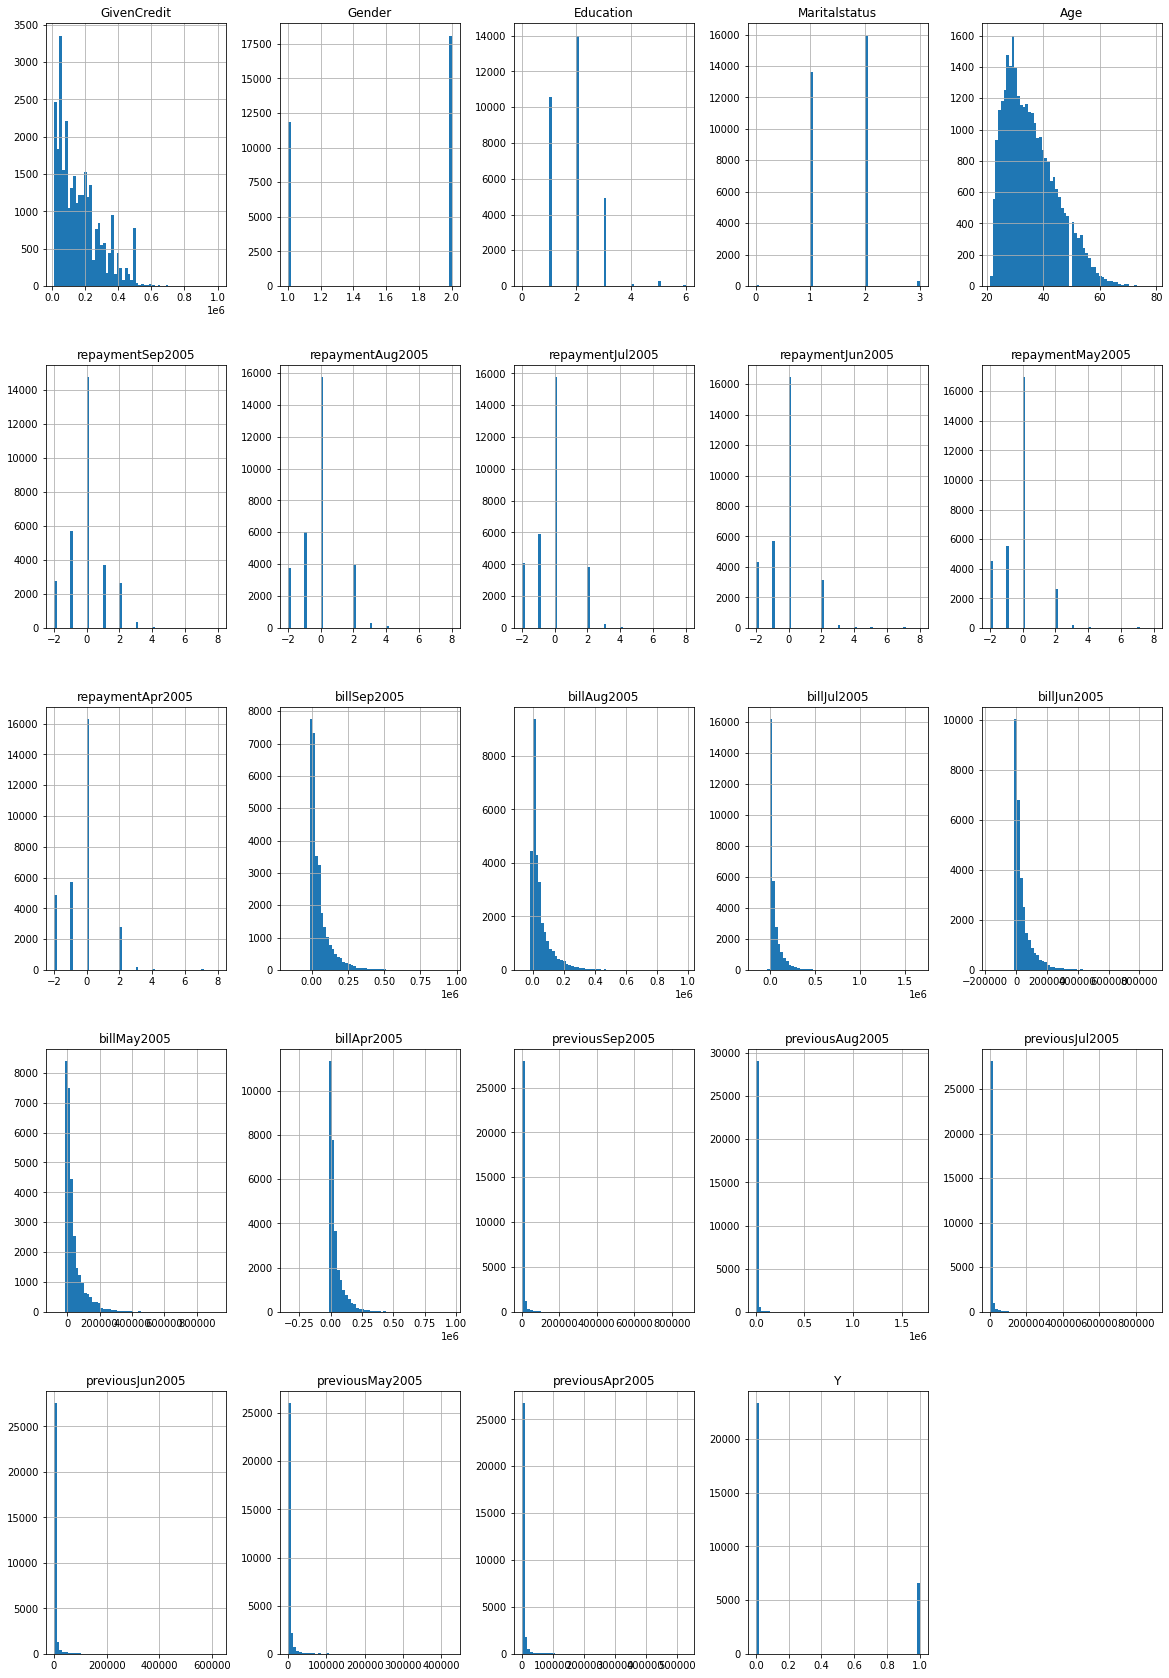

In [73]:
ndf.hist(bins = 60, figsize=(20,30))

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [74]:
ndf.dtypes

GivenCredit           int64
Gender              float64
Education           float64
Maritalstatus       float64
Age                 float64
repaymentSep2005    float64
repaymentAug2005    float64
repaymentJul2005    float64
repaymentJun2005    float64
repaymentMay2005    float64
repaymentApr2005    float64
billSep2005         float64
billAug2005         float64
billJul2005         float64
billJun2005         float64
billMay2005         float64
billApr2005         float64
previousSep2005     float64
previousAug2005     float64
previousJul2005     float64
previousJun2005     float64
previousMay2005     float64
previousApr2005     float64
Y                   float64
dtype: object

In [75]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
GivenCredit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
Maritalstatus,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
repaymentSep2005,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
repaymentAug2005,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
repaymentJul2005,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
repaymentJun2005,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
repaymentMay2005,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


Procedemos a hacer los calculos de mediana y moda, para las variables de Educación y MaritalStatus, con el fin de tener completo el dataframe con esos valores

In [76]:
ndf["Education"].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [77]:
moda_Edu = int(ndf["Education"].mode())

In [78]:
ndf["Education"].median()

2.0

In [79]:
moda_marstat = int(ndf["Maritalstatus"].mode())

In [80]:
ndf["Education"] = ndf["Education"].apply(lambda x: (moda_Edu) if x > 4 else x)
ndf["Education"] = ndf["Education"].apply(lambda x: (moda_Edu) if x < 1 else x)
ndf["Maritalstatus"] = ndf["Maritalstatus"].apply(lambda x: (moda_marstat) if x < 1 else x)

Validamos el status de Dataframe Nuevamente

In [81]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
GivenCredit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Education,29958.0,1.819180,0.707461,1.0,1.00,2.0,2.00,4.0
Maritalstatus,29958.0,1.555344,0.518115,1.0,1.00,2.0,2.00,3.0
Age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
repaymentSep2005,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
repaymentAug2005,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
repaymentJul2005,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
repaymentJun2005,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
repaymentMay2005,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


5. Realiza el conteo de las variables categóricas

Vamos a graficar las variables del Dataframe par que podamos visualizar cuales de estas varibales son Categóricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f583f557b10>,
      dtype=object)

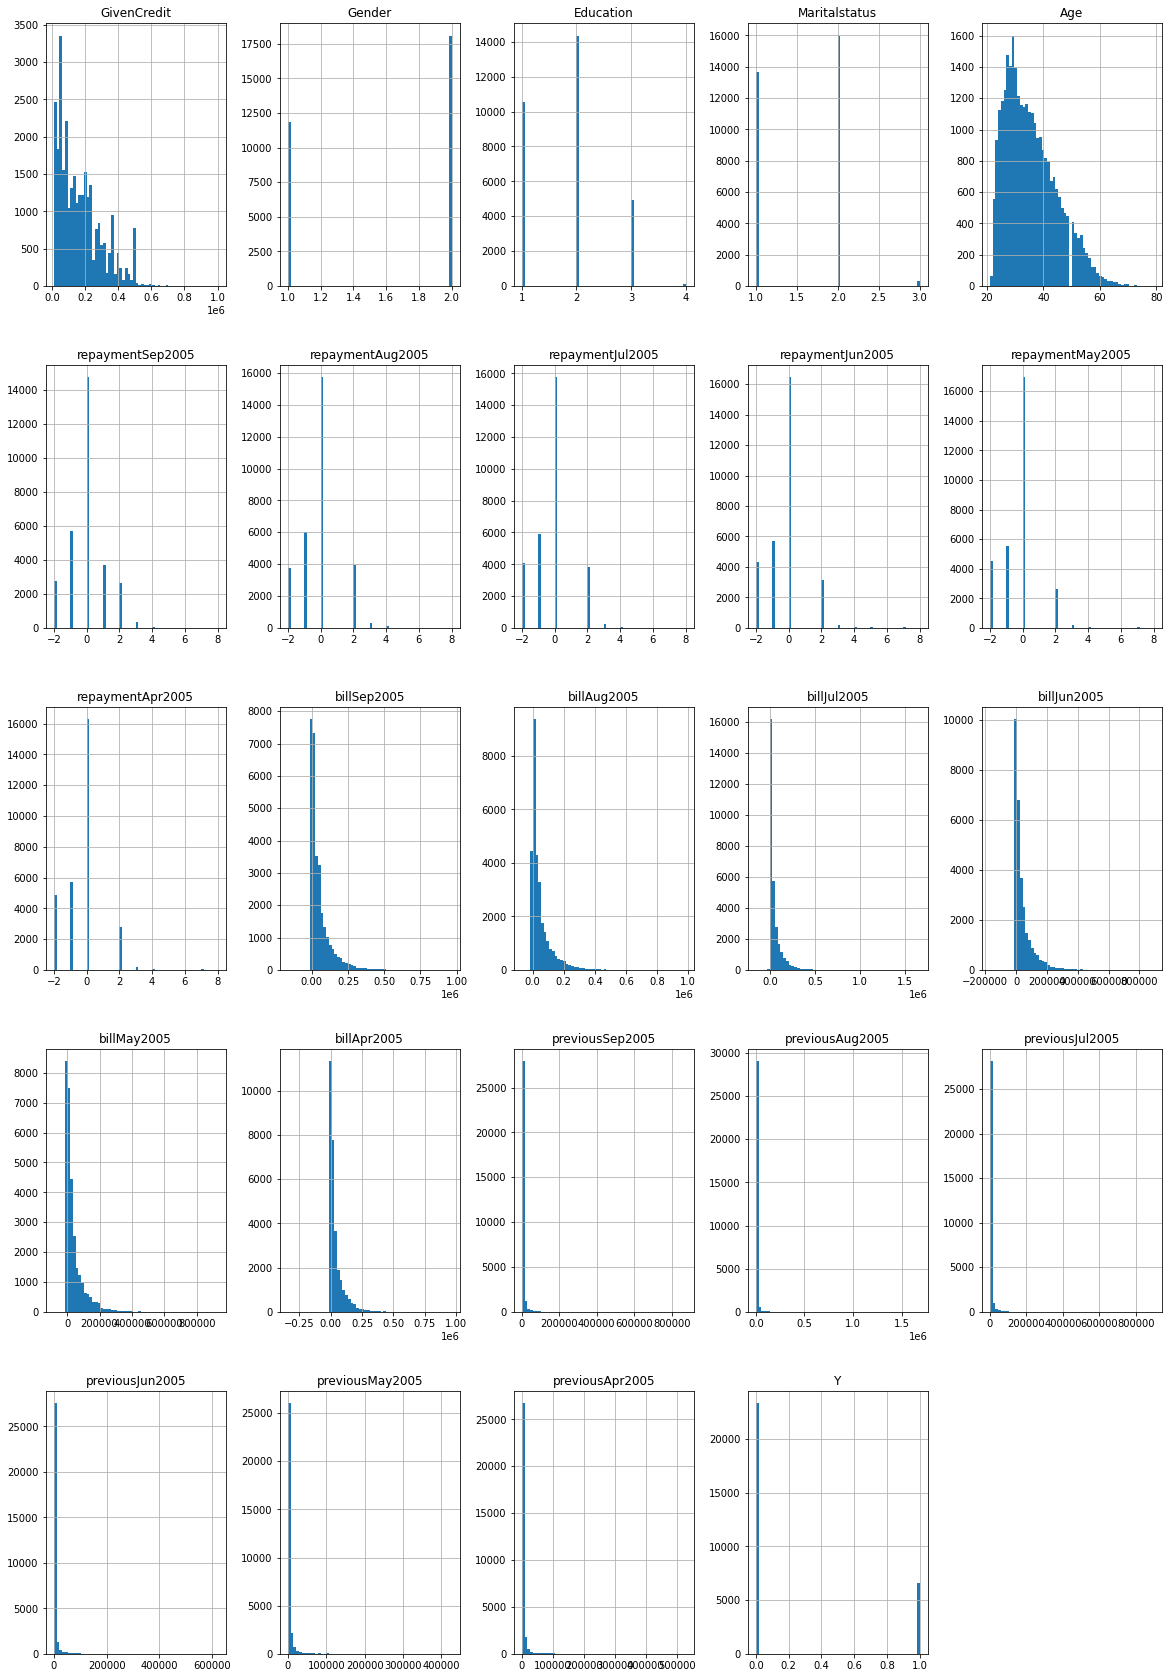

In [82]:
ndf.hist(bins = 60, figsize=(20,30))

A partir del comportamiento de las gráficas podemos visualizar las variables categóricas

In [83]:
var_cat = ['Gender',
 'Education',
 'Maritalstatus',
 'repaymentSep2005',
 'repaymentAug2005',
 'repaymentJul2005',
 'repaymentJun2005',
 'repaymentMay2005',
 'repaymentApr2005']

In [84]:
var_cat

['Gender',
 'Education',
 'Maritalstatus',
 'repaymentSep2005',
 'repaymentAug2005',
 'repaymentJul2005',
 'repaymentJun2005',
 'repaymentMay2005',
 'repaymentApr2005']

6. Escala los datos, si consideras necesario

In [85]:
ndf_imp = ndf.copy()
ndf_imp.drop(columns = var_cat,inplace=True)
ndf_imp.drop(columns ='Y',inplace=True)

Procedemos a ejecutar la escalación de los datos

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(ndf_imp), columns=ndf_imp.columns)
df_transformed.head()

,GivenCredit,Age,billSep2005,billAug2005,billJul2005,billJun2005,billMay2005,billApr2005,previousSep2005,previousAug2005,previousJul2005,previousJun2005,previousMay2005,previousApr2005
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


A continuacion con los datos escalados realizaremos un heatmap, a fin de visualizar el grado de relacion entre las variables. La intención es que esta tabla despues la comparemos con los resultados del PCA, Aqui vemos como hay una fuerte relación de las variables de pago llamadas Bill"month"2005, yendo "month" de abril a septiembre

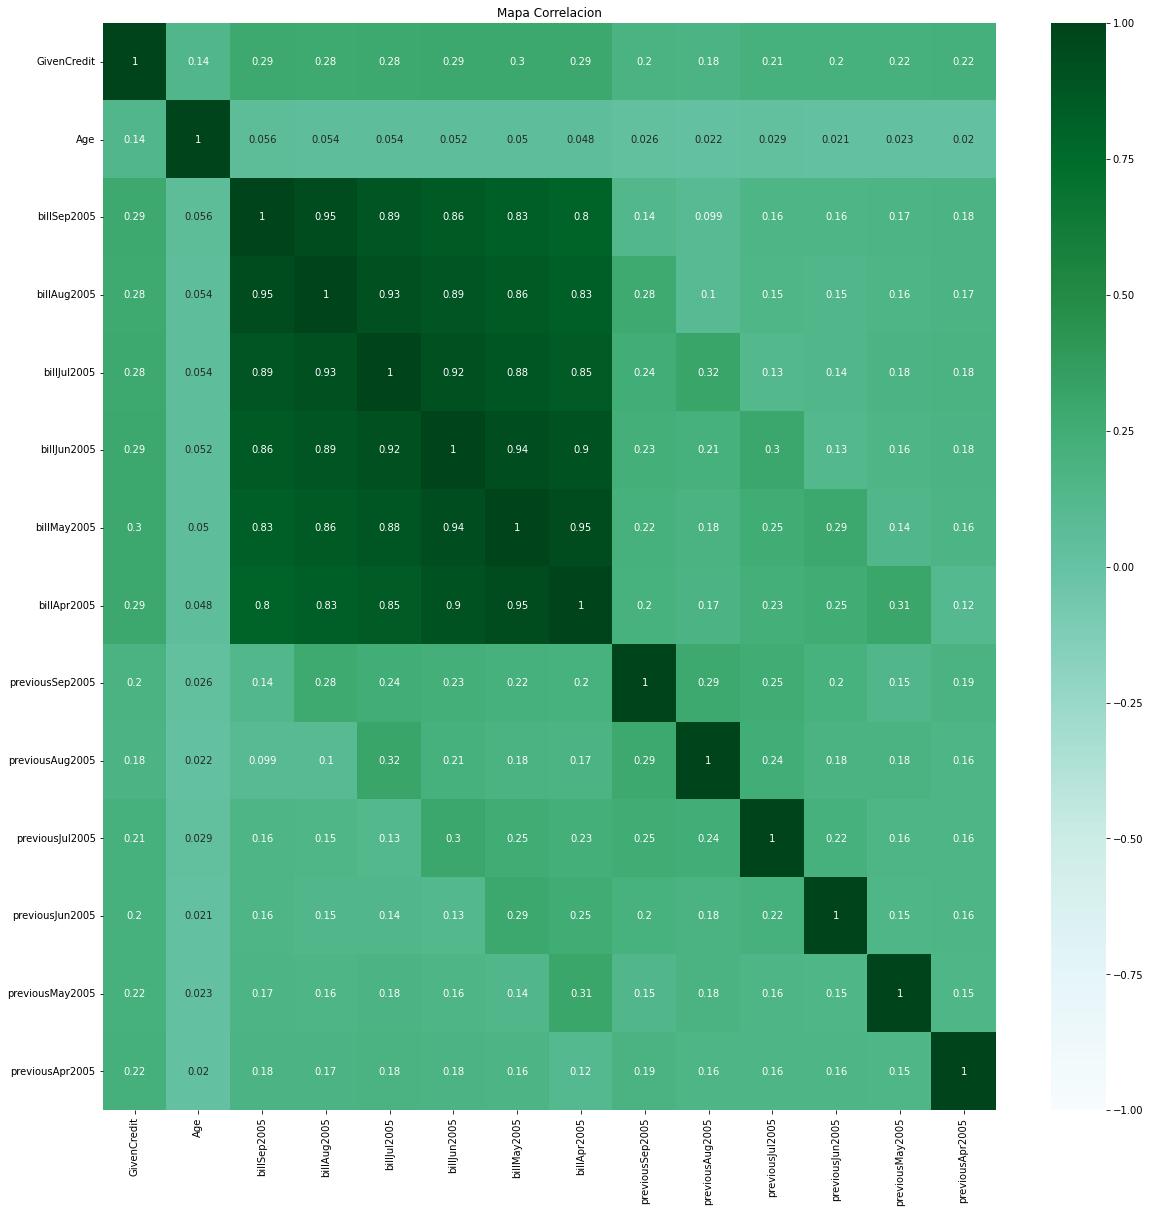

In [87]:
df_transformed_corr = df_transformed.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df_transformed_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)
plt.title("Mapa Correlacion")
plt.show()

7. Reduce las dimensiones con PCA, si consideras necesario.

  > 1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
  > 2. Indica la importancia de las variables en cada componente

Creamos la variables pcs que almacenará la función PCA y aplicamos la funcióna nuestro data frame

In [88]:
pcs = PCA()
pcs_t = pcs.fit_transform(df_transformed)
pcs_t[5]


array([-0.53759796, -0.71199405,  0.08076055,  0.28831706,  0.09145138,
        0.11553635, -0.19369756,  0.01512173,  0.57681419,  0.5051271 ,
        0.02758121,  0.18466932,  0.0113589 , -0.14265935])

Como vemos en los resultados de PCA, la varianza acumulada del 70% se alcanza a partir de 4 componentes de PCA

In [89]:
pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
                              })

pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


In [90]:
pcs_labels = [f'PC{i + 1}' for i in range(len(df_transformed.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


Aqui podemos ver que si no usamos PCA, para poder alcanzar una varianza similar a la que alcanzariamos con los 4 componentes arrojados por PCA, necesitamos al menos considerar 10 variables del dataframe original

In [91]:
total_var =df_transformed.var().sum()
pd.DataFrame({
    "Porcentaje Varianza": (df_transformed.var()/ total_var) * 100,
    "Porcentaje Varianza Acumulado": (df_transformed.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
GivenCredit,7.142857,7.142857
Age,7.142857,14.285714
billSep2005,7.142857,21.428571
billAug2005,7.142857,28.571429
billJul2005,7.142857,35.714286
billJun2005,7.142857,42.857143
billMay2005,7.142857,50.000000
billApr2005,7.142857,57.142857
previousSep2005,7.142857,64.285714
previousAug2005,7.142857,71.428571


In [92]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", df_transformed.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [93]:
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [94]:
comps_df = pd.DataFrame(
pcs.components_.round(4), # pcs.components nos da los pesos de cada uno de los componentes
columns = pcs_df.columns, #Son 13 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC13
index = df_transformed.columns) #Las filas son 13 también, las cuales hacen referencia a las variables originales
#Recuerda, el código siguiente dice que me de todas las filas pero solo las primeras 7 columnas
#La estructura es [filas, columnas]
comps_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
GivenCredit,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885
Age,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059
billSep2005,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339
billAug2005,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396
billJul2005,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068
billJun2005,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993
billMay2005,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076
billApr2005,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498
previousSep2005,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237
previousAug2005,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200


Aqui podemos visualizar cuales son las variables originales que influencia duertemente los componentes arrojados por PCA, es notorio como el comportamiento de los pagos previos son los que mayor influencia tendrán en el modelo de predicción. Además esto tmb se pude corroborar con el mapa de calor que hicmos en secciones pasadas

In [95]:
comps_df.abs().idxmax()

PC1     previousSep2005
PC2         billSep2005
PC3     previousAug2005
PC4     previousApr2005
PC5     previousApr2005
PC6     previousJul2005
PC7     previousMay2005
PC8     previousJul2005
PC9         billApr2005
PC10        billApr2005
PC11        billMay2005
PC12        billJul2005
PC13        billAug2005
PC14        billJul2005
dtype: object

In [96]:
comps_df.iloc[:,:7].abs().idxmax()

PC1    previousSep2005
PC2        billSep2005
PC3    previousAug2005
PC4    previousApr2005
PC5    previousApr2005
PC6    previousJul2005
PC7    previousMay2005
dtype: object

In [97]:
comps_df.iloc[:,:7].abs().idxmin()

PC1    previousMay2005
PC2    previousJul2005
PC3        billMay2005
PC4        billSep2005
PC5    previousSep2005
PC6        billJun2005
PC7        billMay2005
dtype: object

8. Elabora los histogramas de los atributos para visualizar su distribución

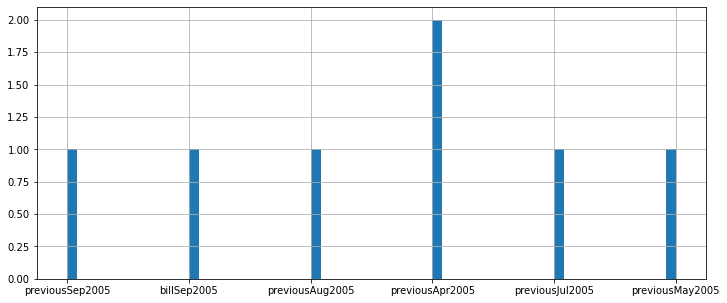

In [98]:
comps_df_high = comps_df.iloc[:,:7].abs().idxmax()
comps_df_high.hist(bins = 60, figsize=(12,5))

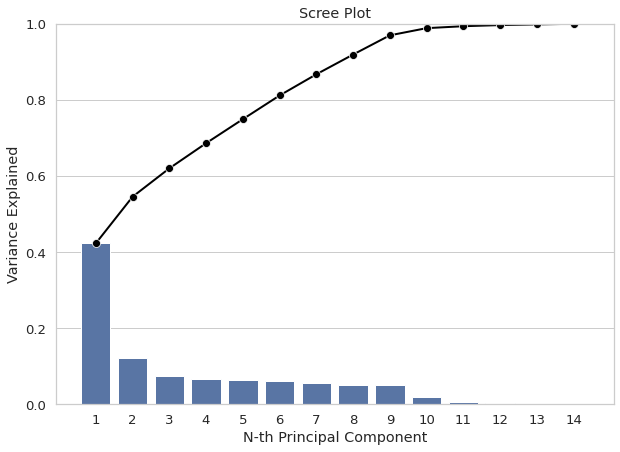

      % varianza explicada  % varianza acumulada
PC1                  42.28             42.277891
PC2                  12.26             54.533132
PC3                   7.46             61.997411
PC4                   6.61             68.605797
PC5                   6.31             74.918180
PC6                   6.23             81.152296
PC7                   5.57             86.721112
PC8                   5.19             91.911302
PC9                   5.05             96.963631
PC10                  1.89             98.852509
PC11                  0.51             99.359679
PC12                  0.29             99.652989
PC13                  0.18             99.833971
PC14                  0.17            100.000000


In [99]:
pcsSummary_df
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()
print(pcsSummary_df)

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

Nuevamente en este gráfico visualizamos el comportamiento general de las variables que componen el dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f583af23950>,
      dtype=object)

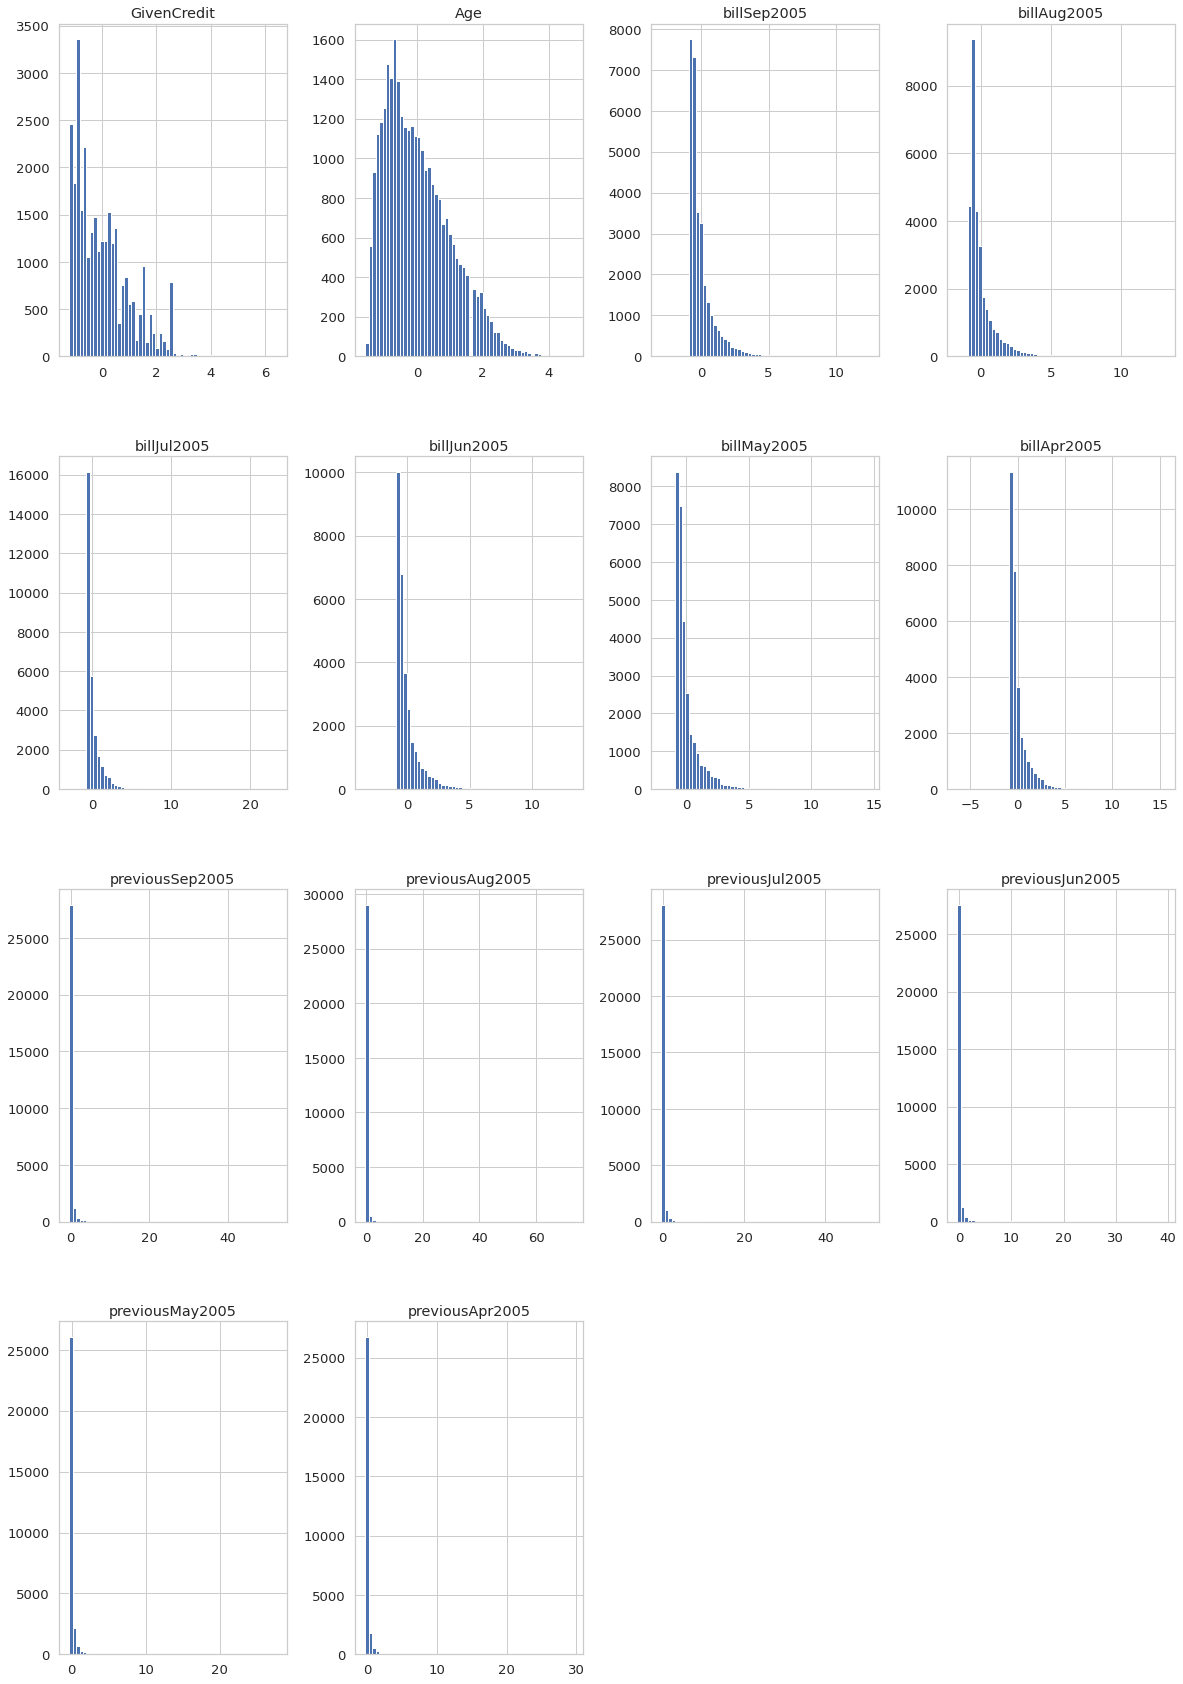

In [100]:
df_transformed.hist(bins = 60, figsize=(20,30))

En este diagrama de caja y bigotes nos podemos dar cuenta de los outliers que tenemos en los datos originales, es interesante ver como en las variables que tienen alta relación o influencia de los componentes de PCA, no tenemos muchos de estos, por lo que no influenciarian de manera negativa nuestro modelo 

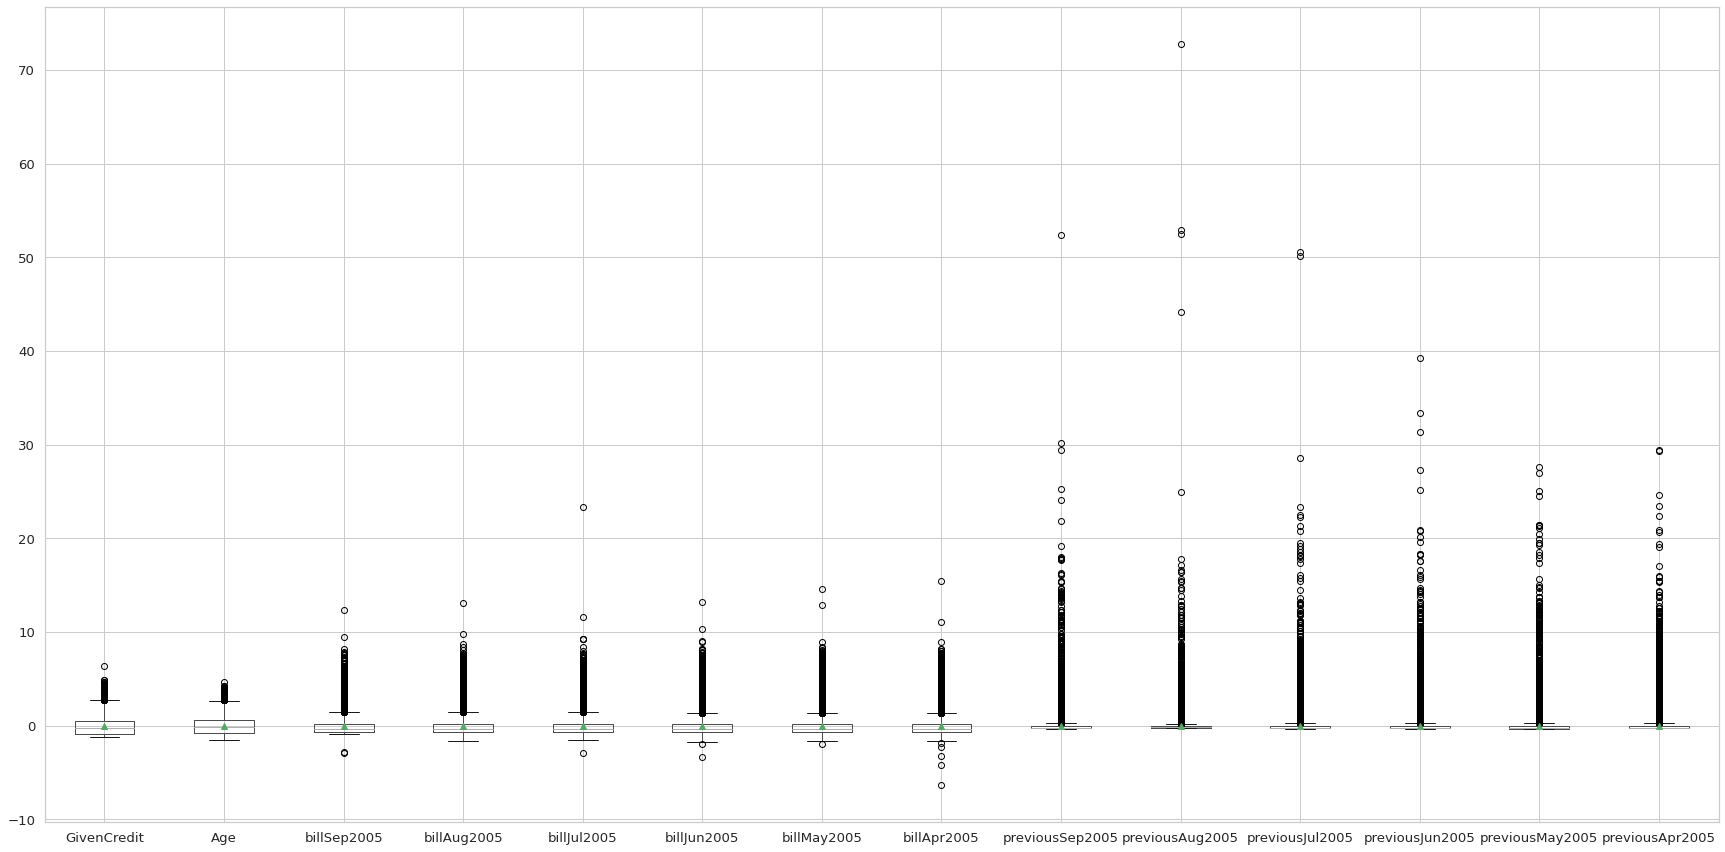

In [101]:
val_atp = df_transformed.boxplot(figsize = (30,15),showmeans = True)
val_atp.plot()
plt.show()

En el sigueinte diagrama de barras podemos ver rapidamente que con 6 componentes de PCA tenemos una muy buena porporción de los datos (81% de varianza acuulada) , practicamente este nos ayudaria a reducir la complejidad del modelo de predicción.

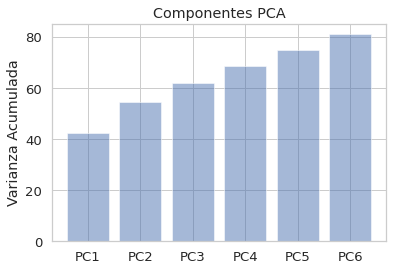

In [102]:
objects = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6')
y_pos = np.arange(len(objects))
performance = [42.27,54.53,61.99,68.6,74.9,81.15]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Varianza Acumulada')
plt.title('Componentes PCA')

plt.show()

Se me ocurrio graficar la relación entre la variable de BillSep2005, la cual es la que mayor influencia tiene en el principal componente de PCA y la variable de salida GivenCredit, como podemos ver esta muy relacionadas entre si.. Esta es una forma gráfica tambien de corroborar los resultados

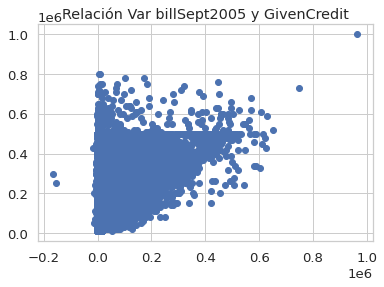

In [107]:
X = ndf["billSep2005"]
y = ndf["GivenCredit"]
plt.scatter(X,y)
plt.title("Relación Var billSept2005 y GivenCredit")
plt.show()

Como asumpción personal,pensaba que la edad influía en el comportamiento de pago de las personas, pero claramente podemos ver una fuerte dispersión o baja relación entre la variable "Age" y la variable de salida Y GivenCredit, con lo que se confirma la edad no es un factor que influya que las personas paguen, mas bien ya en base al estudio, las variables históricas de pago, dicatn el comportamiento futuro del ciente:


(0.0, 1049500.0)

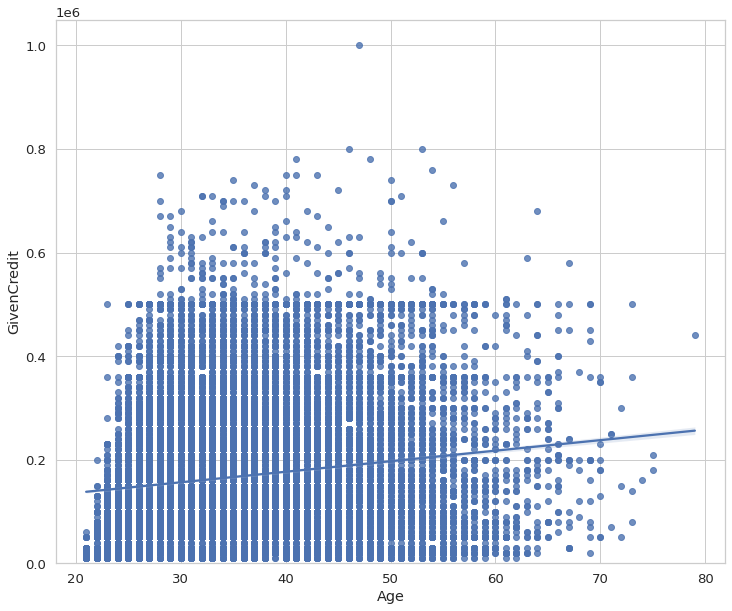

In [104]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Age", y="GivenCredit", data=ndf)
plt.ylim(0,)

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

En este ejercicio, podemos ver rapidamente el beneficio de PCA , ya que nos Ayuda a discriminar de manera más rápida los valores que realmente tienen un impacto, eliminando asi valores que podrián generar solo ruido o no tener un efecto en lo absoluto en la predicción. En resumen, ayuda a reducir las dimensiones de una base de datos muy extensa.

La perdida que se tendria tomando los primeros 6 componentes del modelo PCA  sería de tan solo 19%, dejandonos un porcentaje aceptable de variabilidad, y ayudandonos a reducir la dimensionalidad a la hora de hacer la predicción matemática.

Pienso que se puede utilziar  hasta el componente PC5, pensado en el beneficio que  en cálucclos futuros se manejarian  menos variables facilitando las operaciones y la complejidad del modelo matemático

Es interesante tmabien como las gráficas nos permiten visualizar de manera rápida cuantas variables de PCA son importante ( esto lo vimos con una gráfica de barras), el grado de relación entre las variables de entrada y de salida, además de que podemos comprobar el grado de relación, ya sea con un heatmap, un scatter plot.

En este caso, el diagrama de cahja y bigotes nos permite visualizar los outliers, afortunadamente, para las variables relacionadas no fueron demasiadas, aunque en esta ocasión no fué fácil visualizar graficamente los valores ihnerentes a este tipo de mediana ( cuartiles y premdios)